In [47]:
#IMPORTING THE REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [48]:
#LOADING THE DATASET
df = pd.read_csv('Housing.csv')
print(df.head(5))

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking furnishingstatus  
0              no             yes        2        furnished  
1              no             yes        3        furnished  
2              no              no        2   semi-furnished  
3              no             yes        3        furnished  
4              no             yes        2        furnished  


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'area'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'stories'}>,
        <AxesSubplot:title={'center':'parking'}>]], dtype=object)

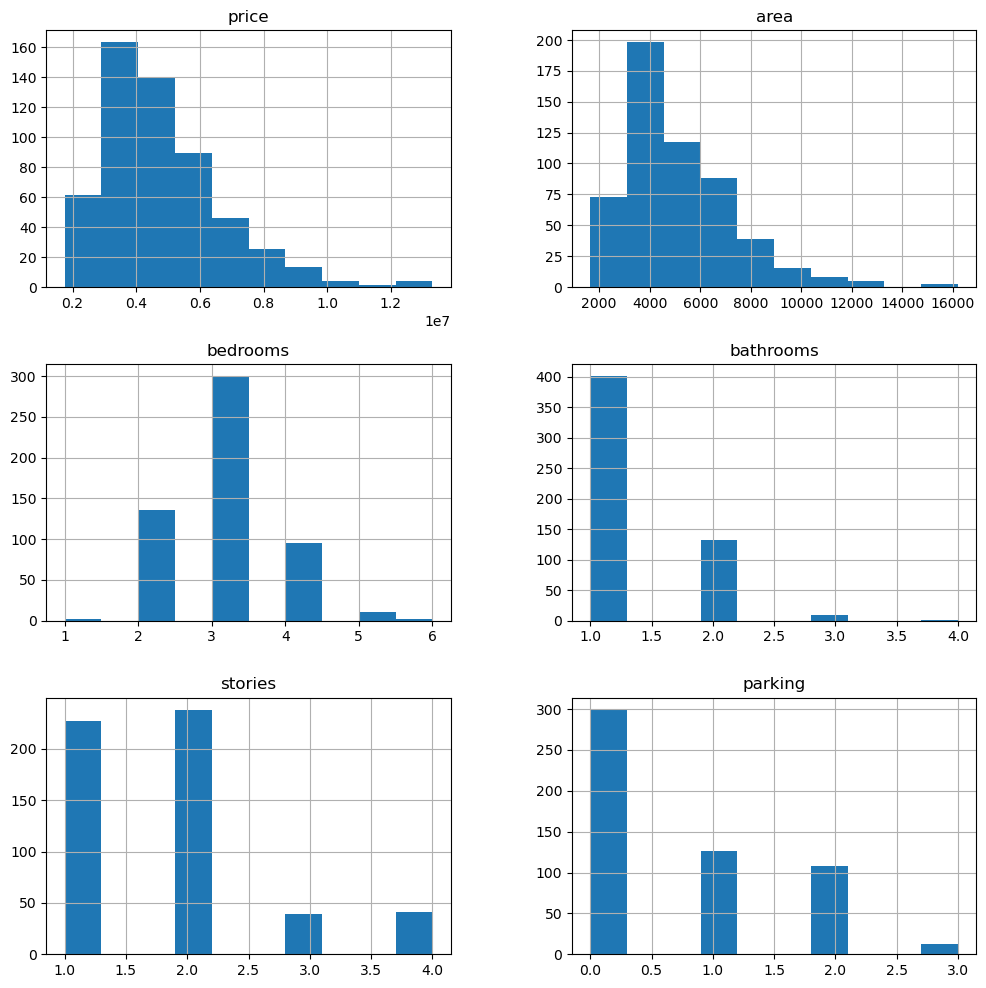

In [49]:
#Performing Univariate Analysis
df.hist(figsize=(12, 12))

Text(0.5, 1.0, 'Bivariate Analysis Area Vs Price')

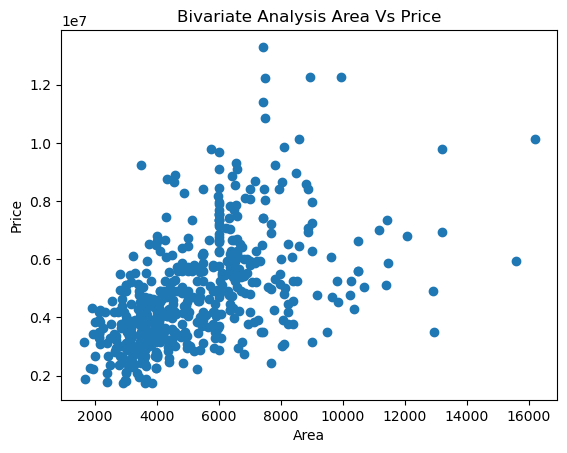

In [50]:
#Performing Bi-Variate Analysis
plt.scatter(df['area'], df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Bivariate Analysis Area Vs Price')

Text(0.5, 1.0, 'Bivariate Analysis Bedrooms Vs Price')

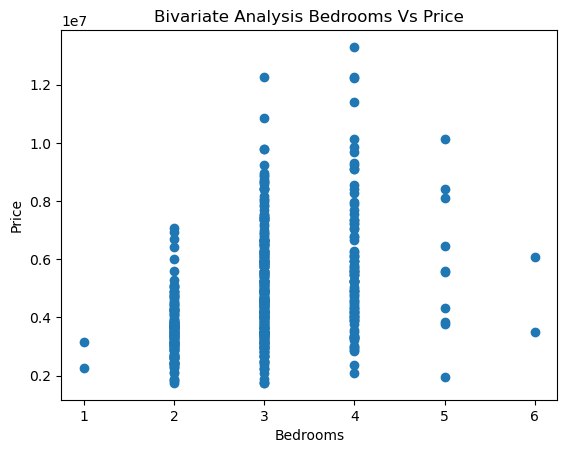

In [51]:
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Bivariate Analysis Bedrooms Vs Price')

Text(0.5, 1.0, 'Bivariate Analysis Bathrooms Vs Price')

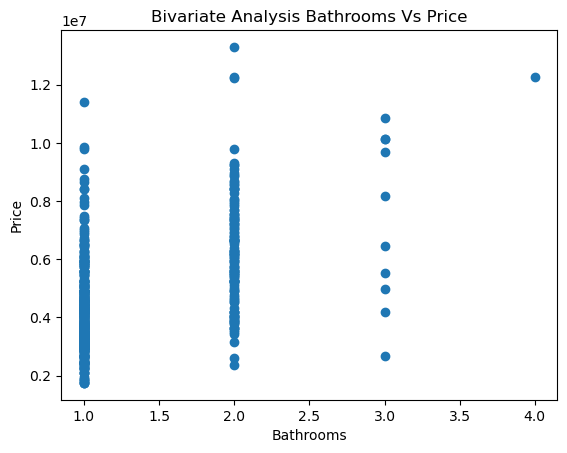

In [52]:
plt.scatter(df['bathrooms'], df['price'])
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Bivariate Analysis Bathrooms Vs Price')

Text(0.5, 1.0, 'Bivariate Analysis Stories Vs Price')

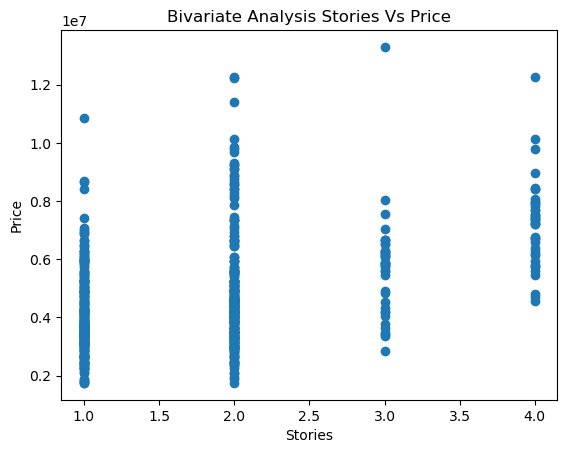

In [53]:
plt.scatter(df['stories'], df['price'])
plt.xlabel('Stories')
plt.ylabel('Price')
plt.title('Bivariate Analysis Stories Vs Price')

Text(0.5, 1.0, 'Bivariate Analysis Parking Vs Price')

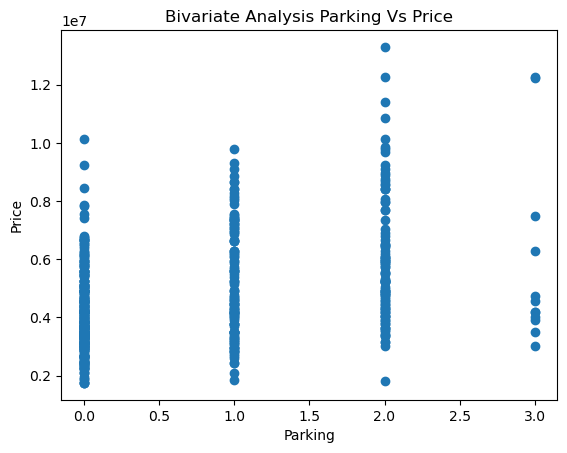

In [54]:
plt.scatter(df['parking'], df['price'])
plt.xlabel('Parking')
plt.ylabel('Price')
plt.title('Bivariate Analysis Parking Vs Price')

In [55]:
#Performing Multi-Variate Analysis
correlation_matrix = df.corr()
print(correlation_matrix)

              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


In [56]:
#Descriptive statistics
descriptive_stats = df.describe()
print(descriptive_stats)

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [57]:
#Check for missing values and deal with them
df.isnull().sum()  
df = df.dropna()
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


In [58]:
from scipy import stats

#Find and replace outliers with Z-test
z_scores = np.abs(stats.zscore(df['price']))
threshold = 3
outliers = np.where(z_scores > threshold)[0]
df.loc[outliers, 'price'] = df['price'].mean()
print("Outliers replaced with mean value:", outliers)

Outliers replaced with mean value: [0 1 2 3 4 5]


In [59]:
#Perform encoding for categorical columns
le = LabelEncoder()
df['mainroad'] = le.fit_transform(df['mainroad'])
df['guestroom'] = le.fit_transform(df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])
df['airconditioning'] = le.fit_transform(df['airconditioning'])
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])

In [61]:
#Split the data into dependent and independent variables
X = df.drop('price', axis=1)
y = df['price']

In [62]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
#Build the models
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()

In [65]:
#Train the models
linear_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [66]:
#Test the models
linear_pred = linear_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

In [67]:
# Measure the performance using metrics
linear_mse = mean_squared_error(y_test, linear_pred)
linear_rmse = mean_squared_error(y_test, linear_pred, squared=False)
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

tree_mse = mean_squared_error(y_test, tree_pred)
tree_rmse = mean_squared_error(y_test, tree_pred, squared=False)
tree_mae = mean_absolute_error(y_test, tree_pred)
print(tree_mse)
print(tree_rmse)
print(tree_mae)

2578169153603.007
1605667.8216876013
1175649.2729568218
